In [1]:
import pandas as pd
from glob import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

In [2]:
df = pd.read_csv('Sales_April_2019.csv')

In [3]:
files = glob('Sales_*')
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

#### Merge data from each month into one CSV

In [4]:
all_months_data = pd.concat((pd.read_csv(file) for file in files), ignore_index = True)
all_months_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
# Store the file in directory
all_months_data.to_csv('all_months_data.csv',index= False)

***

In [6]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
all_months_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
# find NAN indexses and values
# The any() function returns True if any item in an iterable are true, otherwise it returns False.
nan_df = all_months_data[all_months_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
nan_df.drop([1,356,735]).head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


### Drop NA Values & Reset_index

In [10]:
all_data = all_months_data.dropna(how='all')
all_data=all_data.reset_index(drop=True)

In [11]:
#all_data = all_data.drop(columns='index')

In [12]:
all_data= all_data.head(517)
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
512,177050,Apple Airpods Headphones,1,150,04/08/19 09:53,"510 Elm St, Boston, MA 02215"
513,177051,Wired Headphones,2,11.99,04/07/19 08:41,"777 Adams St, Boston, MA 02215"
514,177052,USB-C Charging Cable,2,11.95,04/02/19 09:30,"532 Walnut St, San Francisco, CA 94016"
515,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
516,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"


***

### Make columns correct type

In [13]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Create Month & Year Column

In [14]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data['Year'] = all_data['Order Date'].dt.year
all_data['time'] = all_data['Order Date'].dt.time
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['date'] = all_data['Order Date'].dt.date
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,time,hour,date
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,08:46:00,8,2019-04-19
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,22:30:00,22,2019-04-07
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,14:38:00,14,2019-04-12
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,14:38:00,14,2019-04-12
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,09:27:00,9,2019-04-30


### Make City & State column from Purchase Address 

In [15]:
#def get_city(address):
    #return address.split(",")[1]
#def get_state(address):
    #return address.split(",")[2].split(" ")[1]

In [16]:
#all_data['state'] = all_data['Purchase Address'].apply(get_state)
#all_data['city'] = all_data['Purchase Address'].apply(get_city)

In [17]:
all_data['City']=all_data['Purchase Address'].apply(lambda add:add.split(',')[1])
all_data['State'] = all_data['Purchase Address'].apply(lambda add:add.split(',')[2].split(' ')[1])
all_data['City'].value_counts().head()

 San Francisco    133
 Los Angeles       95
 New York City     67
 Boston            59
 Dallas            40
Name: City, dtype: int64

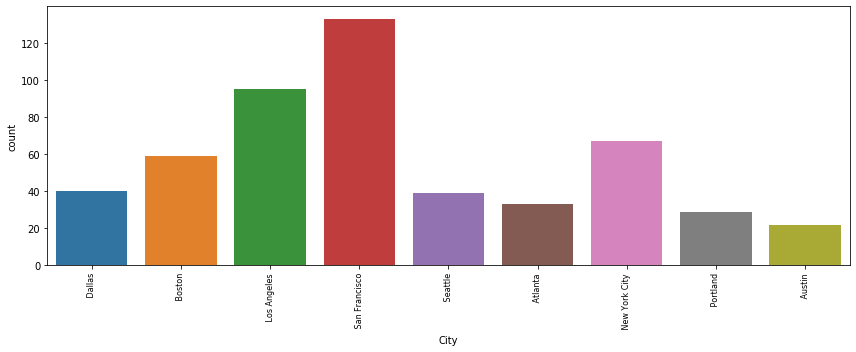

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x='City',data=all_data)
plt.xticks(rotation = 'vertical',size = 8)
plt.tight_layout()

# Add City and State &  ( )

In [19]:
all_data['City'] = all_data['City'] + ' (' +  all_data['State'] + ')'
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,time,hour,date,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,08:46:00,8,2019-04-19,Dallas (TX),TX


In [20]:
# Add Total Sales column
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,time,hour,date,City,State,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,08:46:00,8,2019-04-19,Dallas (TX),TX,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,22:30:00,22,2019-04-07,Boston (MA),MA,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,14:38:00,14,2019-04-12,Los Angeles (CA),CA,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,14:38:00,14,2019-04-12,Los Angeles (CA),CA,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,09:27:00,9,2019-04-30,Los Angeles (CA),CA,11.99


#### What was the best month for sales? How much was earned that month? 

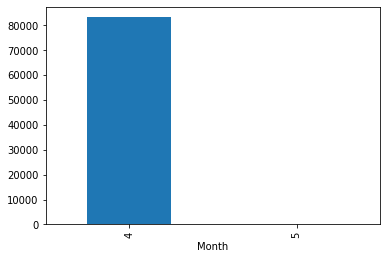

In [21]:
Best_month_sale = all_data.groupby('Month')['Total Sales'].sum().plot.bar()
#Best_month_sale = Best_month_sale.reset_index()
Best_month_sale

In [22]:
#sns.barplot(x='Month',y='Total Sales',data = Best_month_sale)#Dafault is mean

#### What city sold the most product?

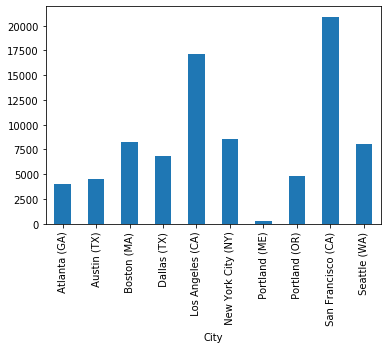

In [23]:
all_data.groupby('City')['Total Sales'].sum().plot.bar()

In [24]:
#plt.figure(figsize=(20,5))
#sns.barplot(x='City',y = 'Total Sales',data = highest_city_sales)
#plt.tight_layout()

In [25]:
highest_city_sales = pd.DataFrame(all_data.groupby('City')['Total Sales'].sum())
highest_city_sales.reset_index(inplace=True)
highest_city_sales

,City,Total Sales
0,Atlanta (GA),3981.12
1,Austin (TX),4502.78
2,Boston (MA),8233.97
3,Dallas (TX),6823.11
4,Los Angeles (CA),17189.06
5,New York City (NY),8534.24
6,Portland (ME),317.97
7,Portland (OR),4814.57
8,San Francisco (CA),20924.94
9,Seattle (WA),8091.17


In [26]:
highest_city_sales.iplot(kind='bar',x='City',y='Total Sales')

#### Which product sold the most as per price & Quantity? Why do you think it sold the most?

In [27]:
quantity_ordered = all_data.groupby('Product')[['Quantity Ordered']].sum()
quantity_ordered.reset_index(inplace=True)
#quantity_ordered.reset_index(drop=True)
quantity_ordered.head()

,Product,Quantity Ordered
0,20in Monitor,11
1,27in 4K Gaming Monitor,15
2,27in FHD Monitor,19
3,34in Ultrawide Monitor,17
4,AA Batteries (4-pack),64


In [28]:
quantity_ordered.iplot(kind='bar',x='Product',y='Quantity Ordered')

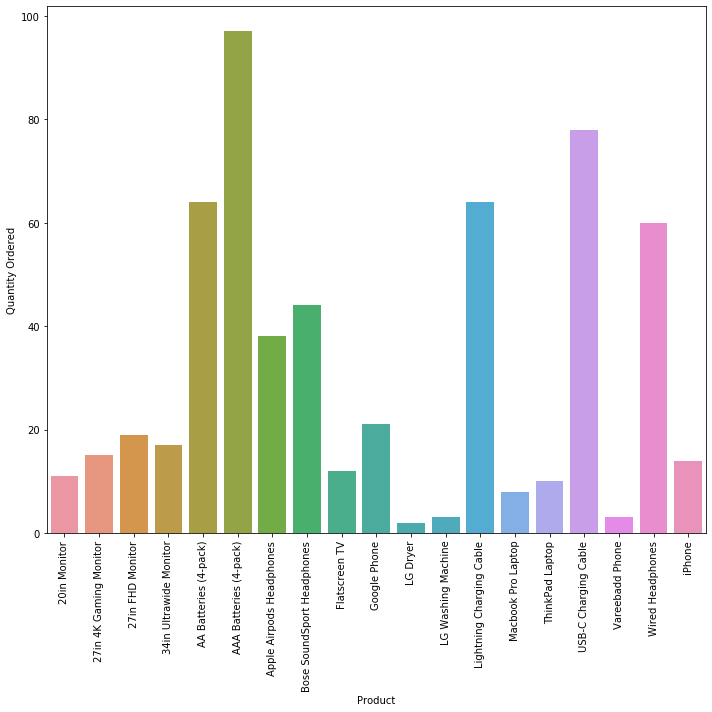

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(x='Product',y='Quantity Ordered',data = quantity_ordered)
plt.xticks(rotation='vertical')
plt.tight_layout()

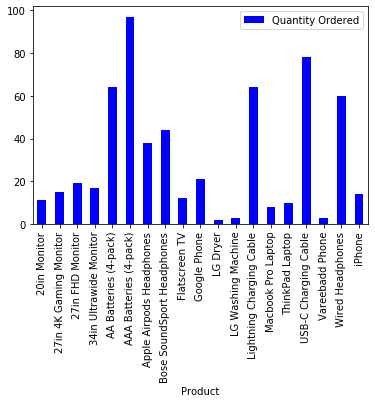

In [30]:
#plot by pandas 
all_data.groupby('Product')[['Quantity Ordered']].sum().plot.bar(color='b')

***

In [31]:
prices = all_data.groupby('Product').mean()[['Price Each']].reset_index()
prices

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


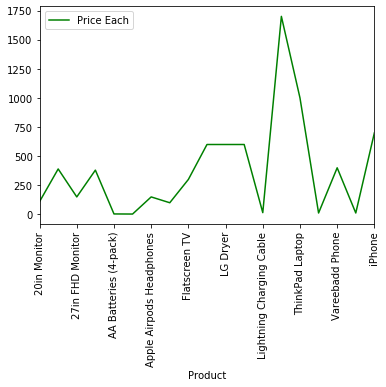

In [32]:
all_data.groupby('Product')[['Price Each']].mean().plot.line(color = 'g',rot='vertical')

Text(0, 0.5, 'Price')

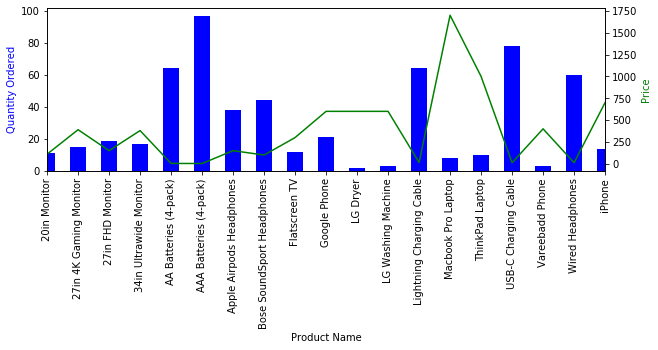

In [33]:
ax = quantity_ordered.plot.bar(x='Product',y='Quantity Ordered',legend=False,color ='b',figsize = (10,3))
ax.twinx()# two scales on the left and right y axis.
ax2 = all_data.groupby('Product')['Price Each'].mean().plot(color = 'g',rot='vertical')#Update second axis according with first axis.
ax.set_xlabel('Product Name')
ax.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price', color='g')


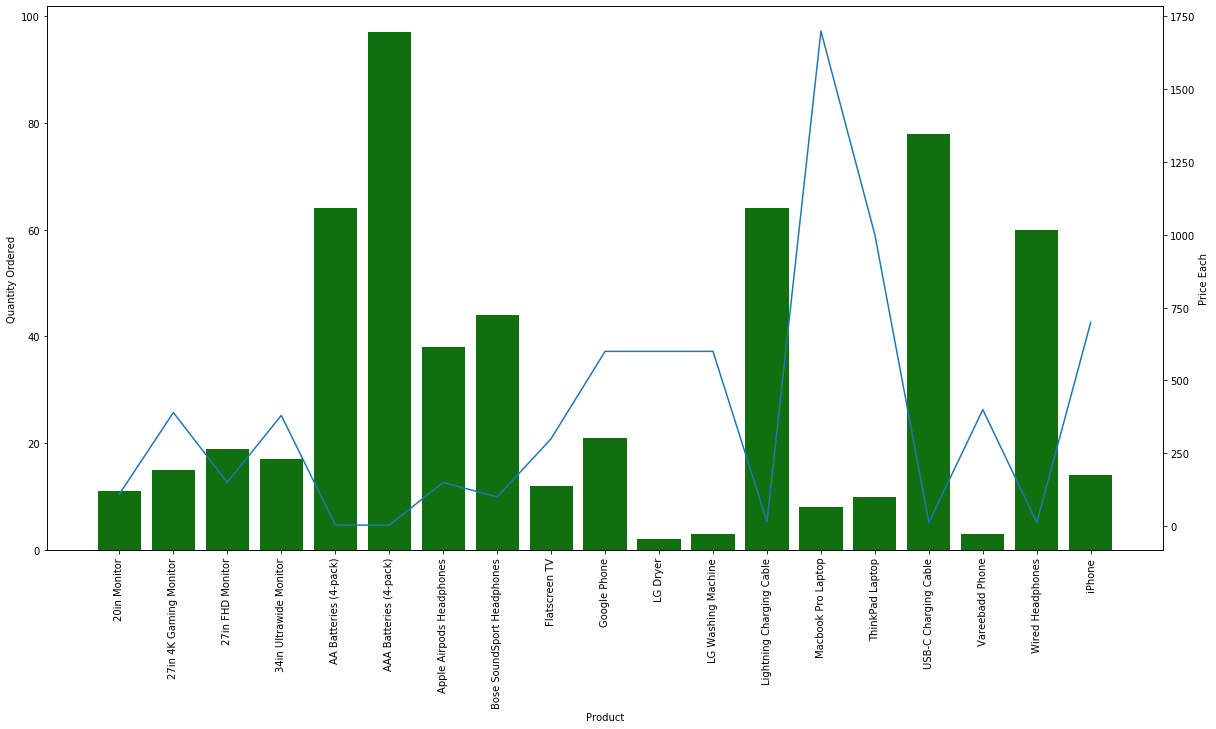

In [34]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Product',y='Quantity Ordered',data = quantity_ordered,color = 'g')
plt.xticks(rotation='vertical')
ax1 = ax.twinx()
sns.lineplot(x='Product',y='Price Each',data = prices,ax = ax1)# ax = Axes object to draw the plot onto, otherwise uses the current Axes. 

##### What time should we display advertisements to maximize likelihood of customer's buying product?

#### Rename column name

In [35]:
countproduct_Hr = all_data.groupby('hour')[['Order ID']].count();countproduct_Hr.head()
countproduct_Hr = countproduct_Hr.reset_index()
countproduct_Hr = countproduct_Hr.rename(columns= {'Order ID': 'Order_count_per_hour'})
countproduct_Hr.head()

,hour,Order_count_per_hour
0,0,10
1,1,6
2,2,3
3,3,1
4,4,3


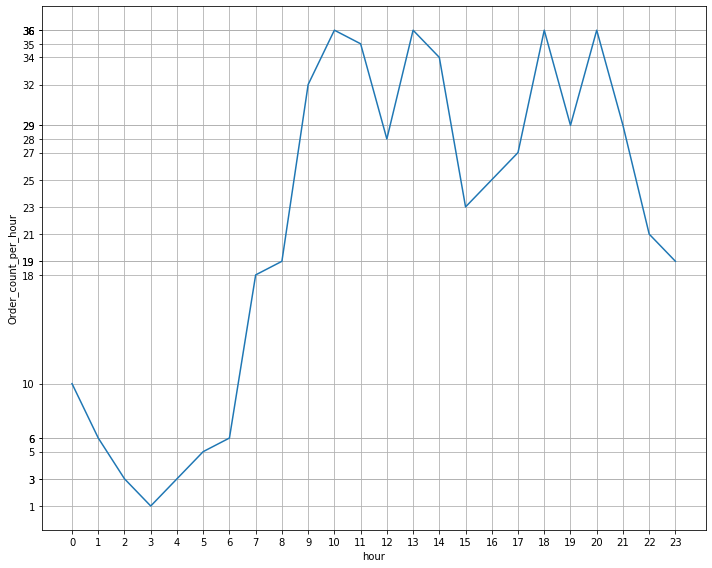

In [36]:
plt.figure(figsize=(10,8))
sns.lineplot(x='hour',y='Order_count_per_hour',data = countproduct_Hr)
plt.xticks(countproduct_Hr['hour'])
plt.yticks(countproduct_Hr['Order_count_per_hour'])
plt.grid()
plt.tight_layout()

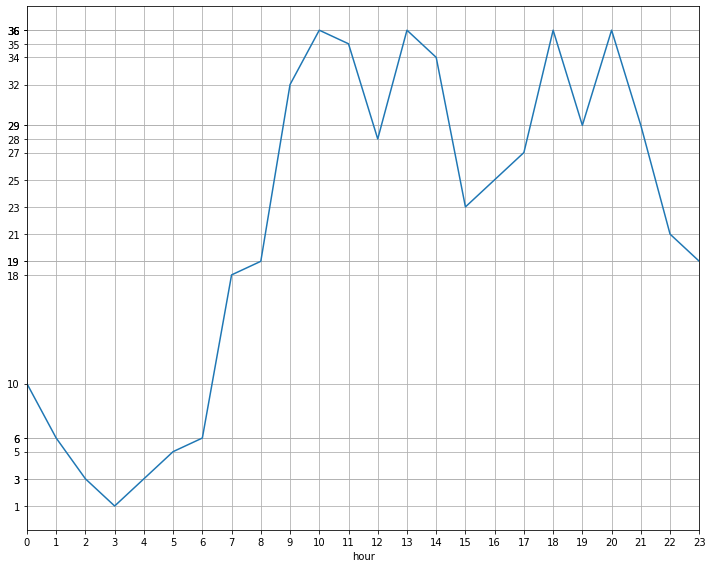

In [37]:
# By using Pandas Visualization
plt.figure(figsize=(10,8))
all_data.groupby(['hour'])['Order ID'].count().plot.line()
plt.xticks(countproduct_Hr['hour'])
plt.yticks(countproduct_Hr['Order_count_per_hour'])
plt.grid()
plt.tight_layout()

In [38]:
countproduct_Hr.iplot(x='hour',y='Order_count_per_hour')

***

# Merge nearly duplicate rows based on column value

### Question 4: What products are most often sold together?

### 1. Convert all duplicates value into new variable

**by using ``.duplicated(keep=)``**

1. **Determines which duplicates (if any) to mark**
2. **first : Mark duplicates as True except for the first occurrence.**
3. **last : Mark duplicates as True except for the last occurrence.**
4. **False : Mark all duplicates as True.**

In [39]:
# False : Mark all duplicates as True
df =all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,time,hour,date,City,State,Total Sales
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,14:38:00,14,2019-04-12,Los Angeles (CA),CA,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,14:38:00,14,2019-04-12,Los Angeles (CA),CA,11.99


In [40]:
df5 = df.groupby('Order ID').agg({'Product': ' | '.join}).reset_index()
df5.head()

,Order ID,Product
0,176560,Google Phone | Wired Headphones
1,176574,Google Phone | USB-C Charging Cable
2,176585,Bose SoundSport Headphones | Bose SoundSport H...
3,176586,AAA Batteries (4-pack) | Google Phone
4,176672,Lightning Charging Cable | USB-C Charging Cable


In [41]:
df5['Product'].value_counts().head()

Google Phone | Wired Headphones                    3
Google Phone | USB-C Charging Cable                3
iPhone | Wired Headphones                          2
Lightning Charging Cable | USB-C Charging Cable    2
34in Ultrawide Monitor | Google Phone              1
Name: Product, dtype: int64

# Another way to Merge nearly duplicate rows based on column value

In [42]:
#df.groupby('Order ID')[['Product']].count().head(2).reset_index()

In [43]:
#df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda value: ','.join(value))
#df.head(2)

In [44]:
#df2 = df[['Order ID', 'Grouped']].drop_duplicates().reset_index()
#df2 = df2.drop(columns=['index'])

In [45]:
#df2

In [46]:
# Return a Series containing counts of unique values.
#df2['Grouped'].value_counts().head()

In [47]:
#df2['Grouped'].value_counts().sum()

***